# ***Описание проекта***

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр за 2016 год, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# ***Описание данных***
 
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# ***План исследования***

* Изучим общую информацию.


* Подготовим данные:
    - Приведем названия столбцов к нижнему регистру.
    - Преобразуем данные в нужные типы.
    - Обработаем пропуски при необходимости.
    - Посчитаем суммы продаж во всех регионах.
 
 
* Проведем исследовательский анализ данных:
    - Посмотрим, сколько игр выпускалось в разные годы.
    - Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.
    - Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
    - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
    - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
    - Соотнесем выводы с продажами игр на других платформах.
    - Посмотрим на общее распределение игр по жанрам.


* Составим портрет пользователя каждого региона:
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.
    

* Проверим гипотезы:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    

* Общий вывод.

##   Изучим общую информацию.

In [1]:
# импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

pd.set_option('display.max_columns', None)

In [2]:
# откроем файл с данными
df = pd.read_csv('/datasets/games.csv')

In [3]:
# посмотрим первые строки датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# посмотрим общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# посчитаем количество пропусков данных по всем колонкам
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

* В датафрейме есть колонки с пропусками:
    * name - удалим так как нам нечем заполнить.
    * year_of_release - удалим так как неоткуда взять эту информацию (кроме нескольких игр в названии которых есть год выпуска).
    * genre - удалим так как нам нечем заполнить.
    * critic_score - оставим без изменений, оценка не подлежит корректному заполнению синтетическими данными.
    * user_score - оставим без изменений, оценка не подлежит корректному заполнению синтетическими данными.
    * rating - заполним значением unknown.

* В датафрейме есть колонки в которых решено заменить тип данных:
    * year_of_release заменим тип на int (так как год это целочисленное значение)
    * user_score заменим на float (так как данные представлены числами с плавающей запятой)

## Подготовим данные

In [6]:
# приведем названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [7]:
# проверим данные на наличие явных дубликатов
df.duplicated().sum()

0

In [8]:
# удалим пропуски в колонках name, year_of_release, genre
df.dropna(subset=['name', 'year_of_release', 'genre'], inplace = True)

# заполним пропуски в колонке rating значением "unknown"
df['rating'].fillna('unknown', inplace=True)

В колонке с пользовательскими оценками есть значения 'tbd' To Be Determined, то есть 'Будет определено', заменим эти значения на np.nan для возможности обработки данного столбца.

In [9]:
# заменим значения 'tbd' в колонке user_score на np.nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [10]:
# заменим типы данных
df['year_of_release'] = df['year_of_release'].astype('int')
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
# посмотрим на уникальные значения и их количество по колонкам platform, year_of_release, genre, rating
for column in df[['platform', 'year_of_release', 'genre', 'rating']].columns:
    display(column)
    display(df[column].nunique())
    display(df[column].unique())

'platform'

31

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

'year_of_release'

37

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

'genre'

12

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

'rating'

9

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

В рейтинге есть значение 'K-A' 'Kids to Adults', оно использовалось с 1994 по 1997 гг и далее было заменено на 'E' 'Everyone'. Заменим в наших данных значение 'K-A' на 'E'.

In [12]:
# заменим в наших данных значение 'K-A' на 'E'
df['rating'] = df['rating'].replace('K-A', 'E')

# проверим изменения
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
# добавим новый столбец с суммарными продажами во всех регионах
df['all_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# проверим результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Проверим на наличие аномальных значений наши числовые колонки.

In [14]:
# с помощью цикла применим метод describe к нужным колонкам
for column in df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'all_sales', 'critic_score', 'user_score']].columns:
    display(column)
    display(df[column].describe())

'na_sales'

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

'eu_sales'

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

'jp_sales'

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

'other_sales'

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

'all_sales'

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: all_sales, dtype: float64

'critic_score'

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

'user_score'

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

С помощью метода describe видно что по каждому региону продаж у многих игр нулевой показатель, также в общих продажах есть нулевые значения.


В колонке user_score есть игры с показателем равным нулю. Проверим их количество. Если подобных игр мало то просто удалим данные о них.

In [15]:
# посмотрим количество игр с нулевыми оценками пользователей
df.loc[df['user_score'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0.0,E,0.72


In [16]:
# удалим игру с нулевой пользовательской оценкой
df = df.drop(2835)

## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

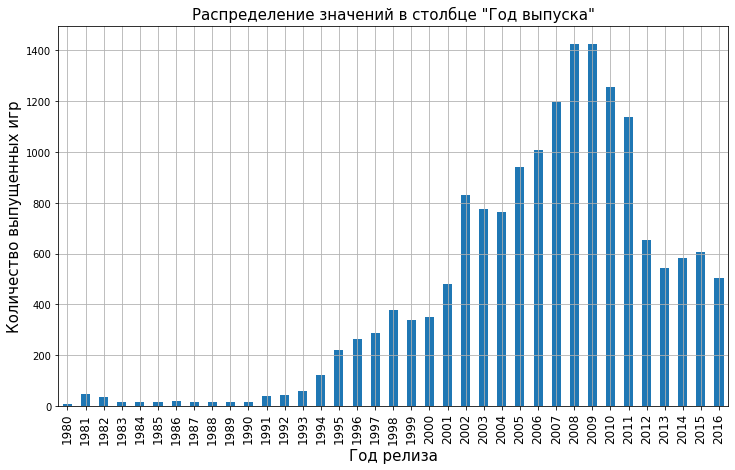

In [17]:
# построим график по распределению релиза игр по годам

params = {
          'axes.titlesize': 15,
          'xtick.labelsize': 12,
          'axes.labelsize': 15
          }
plt.rcParams.update(params)
df['year_of_release'].value_counts().sort_index().plot(kind='bar', grid=True, figsize=(12, 7))
plt.title('Распределение значений в столбце "Год выпуска"')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр')
plt.show()

До 1994 года выпускалось очень мало игр (отметку в 50 преодалели только в 1993 году). Начиная с 1994 года годовое производство игр превысило 120 и очень сильно росло ежегодно вплоть до 2009 года после чего пошло на спад. Данные за все периоды не важны для данного исследования так как платформы имеют свойство устаревать и на их смену приходят новые более технически продвинутые.

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

In [18]:
# выберем 10 платформ с наибольшими суммарными продажами
pivot_top_10 = df.pivot_table(index='platform',
                              values='all_sales',
                              aggfunc='sum').sort_values(by='all_sales', ascending=False).iloc[:10]

# выведим на экран получившуюся таблицу
display(pivot_top_10)

# создадим список с топ-10 платформами
top_platform = pivot_top_10.index.to_list()

# проверим наш список
top_platform

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.06
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


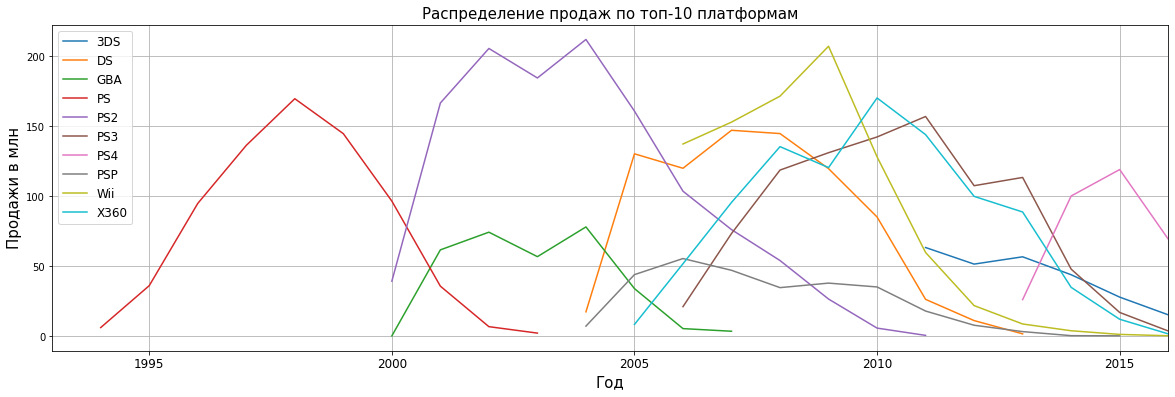

In [19]:
# сделаем сводную таблицу по топ 10 платформам с ежегодными продажами
pivot_ten = df.loc[df['platform'].isin(top_platform)].pivot_table(index='year_of_release',
                                                      columns = 'platform', 
                                                      values='all_sales', 
                                                      aggfunc='sum')

# посмотрим нашу таблицу
display(pivot_ten)

# выведем линейный график по топ 10 платформам с ежегодными продажами
pivot_ten.plot(grid=True, figsize=(20, 6))
plt.ylabel('Продажи в млн')
plt.xlabel('Год')
plt.title('Распределение продаж по топ-10 платформам')
plt.legend(fontsize=12)
plt.xlim(1993, 2016)
plt.show()

Самая старая платформа в нашем топ-10 это 'PS', просуществовала 10 лет. Через 6 лет после старта продаж игр на 'PS' появились новые платформв: 'GBA' и 'PS2', первая из которых просуществовала 8 лет а вторая 12. В дальнейшем появление новых платформ ускорилось. Из данного графика можно сделать вывод что популярные платформы существуют примерно от 8 до 12 лет, и новые поколения платформ выходят на рынок в диапазоне от 4 до 6 лет.

### Возьмем данные за соответствующий актуальный период. Актуальный период определим по результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

По результатам исследования предидущих вопросов было решено использовать данные начиная с 2015 года, так как данные имеют свойство устаревать, тем более в такой быстроразвивающейся сфере как игровая индустрия, в эту выборку попадут консоли которые еще не потеряли своей актуальности и игры на них производятся в 2016 году. Считаю что периуд с 2015 по 2016 является наиболее подходящим для нашего исследования.

### Выясним какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [20]:
# посмотрим какие платформы лидируют по продажам с 2015 года
df.loc[df['year_of_release'] >= 2015].pivot_table(index='platform', 
                                                  values='all_sales', 
                                                  aggfunc='sum').sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


In [21]:
# посмотрим на распределение продаж за интересующий нас период
df.loc[df['year_of_release'] >= 2015].pivot_table(index='platform',
                                                  columns='year_of_release',
                                                  values='all_sales', 
                                                  aggfunc='sum')

year_of_release,2015,2016
platform,,
3DS,27.78,15.14
PC,8.52,5.25
PS3,16.82,3.60
PS4,118.90,69.25
PSP,0.12,NaN
PSV,6.25,4.25
Wii,1.14,0.18
WiiU,16.35,4.60
X360,11.96,1.52


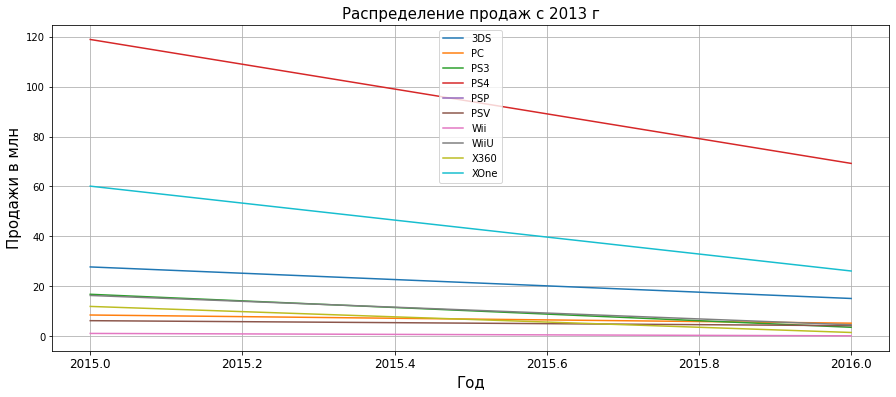

In [22]:
# отрисуем график продаж с 2013 года по платформам
df.loc[df['year_of_release'] >= 2015].pivot_table(index='year_of_release', 
                                                  columns = 'platform', 
                                                  values='all_sales', 
                                                  aggfunc='sum').plot(grid=True, figsize=(15, 6))

plt.ylabel('Продажи в млн')
plt.xlabel('Год')
plt.title('Распределение продаж с 2013 г')
plt.legend(fontsize=10)
plt.show()

По продажам можно выделить 4 лидирующие платформы: 'PS4', 'XOne', '3DS', 'WiiU'. По всем лидирующим платформам последнии 2 года продажи падают. Не смотря на падение продаж, потенциально прибыльными платформами можно назвать 'XOne' и 'PS4' так как это самые новые платформы из данного списка. Так же можно отметить '3DS' и 'WiiU' которые показывают не очень высокие но достаточно стабильные результаты. Но стоит учитывать появление новых платформ в ближайшие пару лет так как 'XOne' и 'PS4' существуют уже 4 года и пользовательский спрос на игры в последнии 2 года начал снижаться.

Так же стоит отметить платформу 'PC', игры на нее будут выходить всегда хоть и пользуются меньшей популярностью (в топ платформ за последнии 2 года 'PC' занимает 6 место из 10 с показателем проданных коппий в 13.7 млн)

### Построим график boxplot по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [23]:
# создадим отдельный датафрейм для 2х топ платформ
df_top2 = df.loc[df['platform'].isin(['PS4', 'XOne'])]

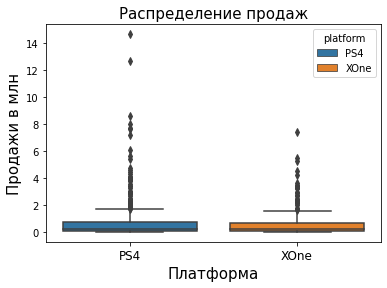

In [24]:
# Построим boxplot распределения продаж игр по платформам 'PS4' и 'XOne'
sns.boxplot(data=df_top2, x='platform', y='all_sales', hue='platform', dodge=False)
plt.ylabel('Продажи в млн')
plt.xlabel('Платформа')
plt.title('Распределение продаж')
plt.show()

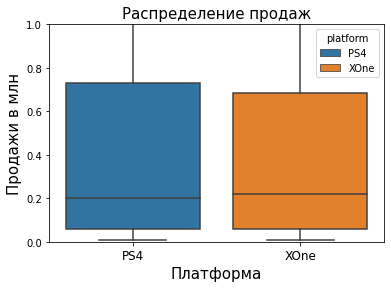

In [25]:
# Уменьшим диапазон по оси y для более детального рассмотрения
sns.boxplot(data=df_top2, x='platform', y='all_sales', hue='platform', dodge=False)
plt.ylim(0, 1)
plt.ylabel('Продажи в млн')
plt.xlabel('Платформа')
plt.title('Распределение продаж')
plt.show()

По графикам видно что медианное значение продаж по обеим платформам находится на одном уровне но при этом у 'PS4', больше межквартильный размах что говорит нам о большей вариативности показателя продаж (большее количество игр по продажам сильнее отклоняется от средних показателей). Так же у 'PS4' намного больше выбросов вверх, есть даже 2 явных лидера с показателем проданых копий более 12 млн. И в целом у 'PS4' больше игр с высоким показателем продаж.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

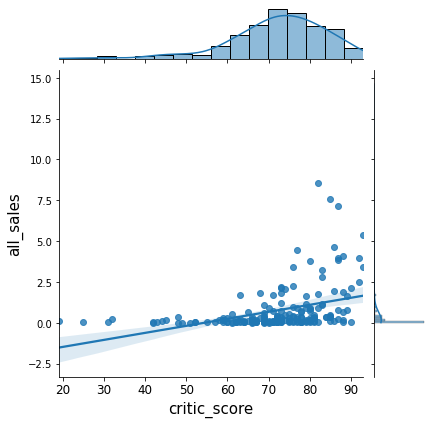

In [26]:
# создадим отдельный датафрейм для дальнейшего исследования по 2015-2016 гг
df_actual = df.loc[df['year_of_release'] >= 2015]

# выделим продажи только по платформе 'PS4'
df_ps4 = df_actual.loc[df_actual['platform'] == 'PS4']

# построим график рассеивания critic_score и all_sales
sns.jointplot(x='critic_score', y='all_sales', data=df_ps4, kind='reg')
plt.show()

In [27]:
# расчитаем коэффицент корреляции Пирсона
df_ps4['critic_score'].corr(df_ps4['all_sales'])

0.3928485555130601

По графику заметна положительная линейная зависимость между оценкой критиков и общими продажами. Показатель корреляции по коэффиценту Пирсона 0.3928485555130601.

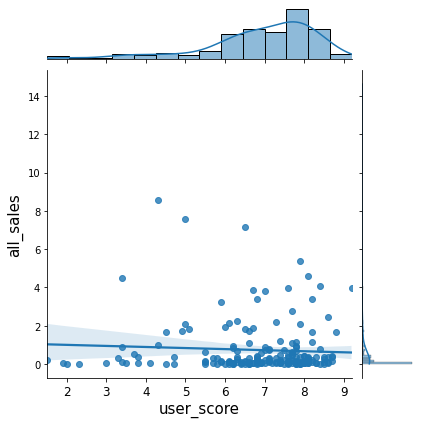

In [28]:
# построим график рассеивания user_score и all_sales
sns.jointplot(x='user_score', y='all_sales', data=df_ps4, kind="reg")
plt.show()

In [29]:
# расчитаем коэффицент корреляции Пирсона
df_ps4['all_sales'].corr(df_ps4['user_score'])

-0.05973845712638215

По графику заметна очень слабая, отрицательная зависимость между оценкой пользователей и общими продажами. Показатель корреляции по коэффиценту Пирсона -0.05973845712638215. Можно считать что корреляция нулевая.

### Соотнесем выводы с продажами игр на других платформах.

Проверим влияние оценок критиков и пользователей еще на 2х потенциально прибыльных платформах 'XOne' и '3DS'.

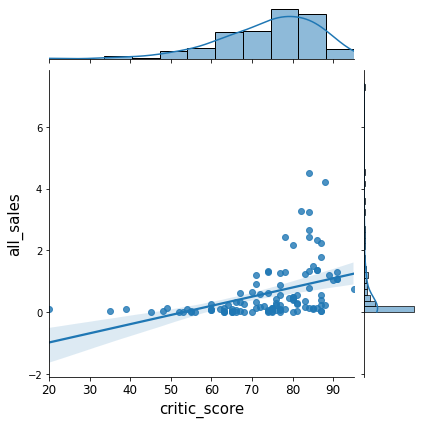

In [30]:
# выделим продажи только по платформе 'XOne'
df_xone = df_actual.loc[df_actual['platform'] == 'XOne']

# построим график рассеивания critic_score и all_sales
sns.jointplot(x='critic_score', y='all_sales', data=df_xone, kind='reg')
plt.show()

In [31]:
# расчитаем коэффицент корреляции Пирсона
df_xone['critic_score'].corr(df_xone['all_sales'])

0.43088874582136805

По графику и по коэффиценту видим что что линейная зависимость показателя оценки критиков и общих продаж выше чем у 'PS4'. Показатель корреляции по коэффиценту Пирсона 0.43088874582136805.

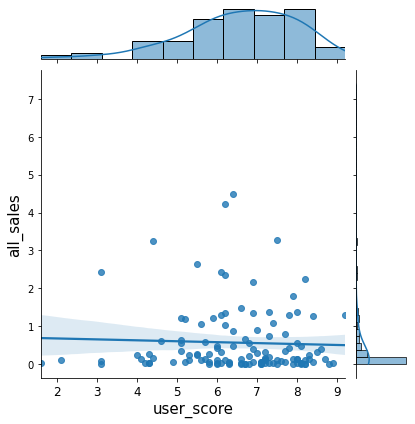

In [32]:
# построим график рассеивания user_score и all_sales
sns.jointplot(x='user_score', y='all_sales', data=df_xone, kind="reg")
plt.show()

In [33]:
# расчитаем коэффицент корреляции Пирсона
df_xone['all_sales'].corr(df_xone['user_score'])

-0.04146733387366271

Для 'XOne' так же как и в случае с 'PS4' корреляцию между пользовательскими оценками и продажами можно считать нулевой. Показатель корреляции по коэффиценту Пирсона -0.04146733387366271.

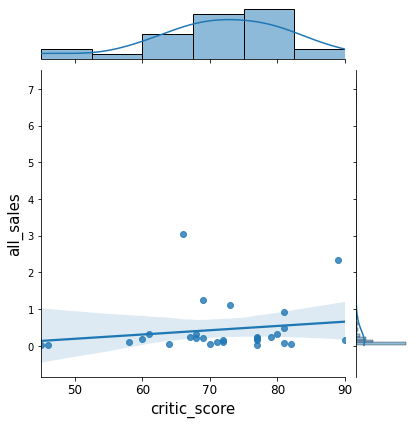

In [34]:
# выделим продажи только по платформе '3DS'
df_3ds = df_actual.loc[df_actual['platform'] == '3DS']

# построим график рассеивания critic_score и all_sales
sns.jointplot(x='critic_score', y='all_sales', data=df_3ds, kind='reg')
plt.show()

In [35]:
# расчитаем коэффицент корреляции Пирсона
df_3ds['critic_score'].corr(df_3ds['all_sales'])

0.17757455046092874

Для '3DS' заметна небольшая положительная линейная зависимость между оценками критиков и продажами. Показатель корреляции по коэффиценту Пирсона 0.17757455046092874.

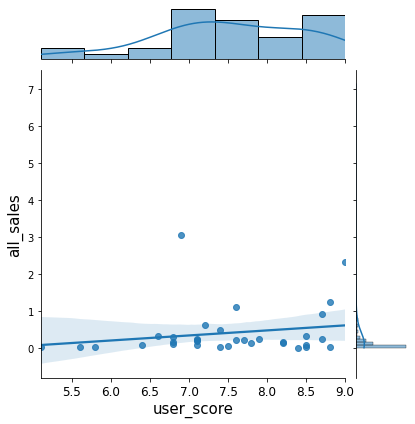

In [36]:
# построим график рассеивания user_score и all_sales
sns.jointplot(x='user_score', y='all_sales', data=df_3ds, kind="reg")
plt.show()

In [37]:
# расчитаем коэффицент корреляции Пирсона
df_3ds['all_sales'].corr(df_3ds['user_score'])

0.19879627008102985

И впервые из 3х изученных платформ у '3DS' заметна небольшая положительная зависимость между оценкой пользователей и уровнем продаж. Показатель корреляции по коэффиценту Пирсона 0.19879627008102985.

По проведенному исследованию взаимосвязей оценок и продаж можно сказать что стоит обращать внимание на оценки критиков так как они имеют линейную связь с уровнем продаж в отличии от оценок пользователей.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами.

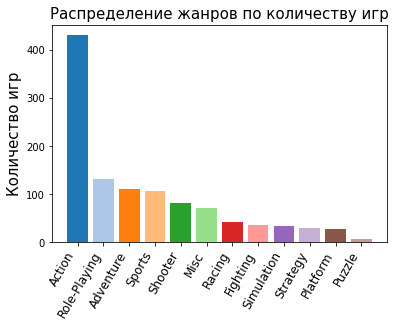

In [38]:
# создадим таблицу жанров и количества игр
genre = df_actual['genre'].value_counts()

# построим график распределения игр по жанрам
plt.title('Распределение жанров по количеству игр')
labels = genre.index.unique()
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
plt.ylabel('Количество игр')
plt.xticks(rotation=60, ha = 'right')
plt.bar(genre.index, genre.values, color=[colors[key] for key in labels])
plt.show()

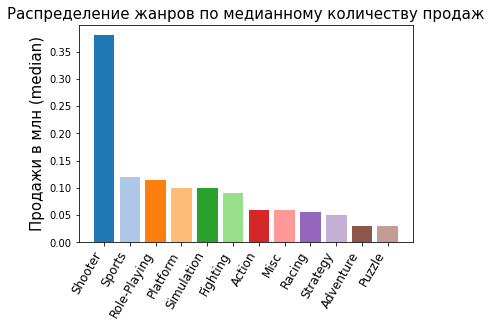

In [39]:
# построим график распределения жанров по продажам
pivot = df_actual.pivot_table(index='genre', 
                       values='all_sales', 
                       aggfunc='median').sort_values(by='all_sales', ascending=False)

plt.title('Распределение жанров по медианному количеству продаж')
plt.ylabel('Продажи в млн (median)')
plt.xticks(rotation=60, ha = 'right')
plt.bar(pivot.index, pivot['all_sales'], color=[colors[key] for key in labels])
plt.show()

По графикам можно заметить что лидером выходящих на рынок игр, с огромным отрывом от остальных является жанр 'Action'. Но по медианному значению продаж занимает лишь 7 место. На первом же месте по продажам стоит жанр 'Shooter' так же с огромным отрывом остальных. На 2 и 3 месте расположились 'Sports' и 'Role-Playing'. Можно сказать что стрелялок выходит не так уж много по отношению к другим жанрам но они являются самыми востребованными среди пользователей.

## Составим портрет пользователя каждого региона.

### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

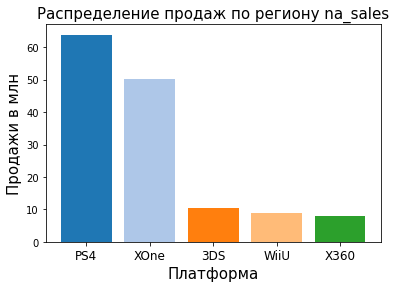

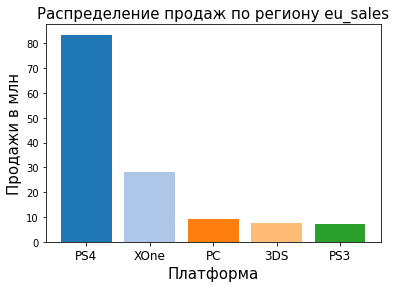

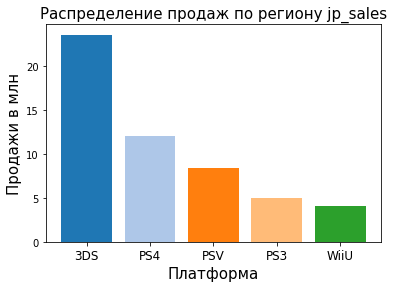

In [40]:
# создадим список интересующих нас регионов продаж
region_sales = ['na_sales', 'eu_sales', 'jp_sales']

# пройдем циклом по каждому региону и выведем графики продаж по топ-5 платформам
# в каждом регионе с суммарным показателем
for region in region_sales:
    top_5_in_region = df_actual.pivot_table(index='platform', 
                                 values=region, 
                                 aggfunc='sum').sort_values(by=region, ascending=False).iloc[:5]


    labels = top_5_in_region.index.unique()
    colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
    plt.ylabel('Продажи в млн')
    plt.xlabel('Платформа')
    plt.title(f'Распределение продаж по региону {region}')
    plt.bar(top_5_in_region.index, top_5_in_region[region], color=[colors[key] for key in labels])
    plt.show()

По графикам распределения продаж среди топ-5 платформ по регионам можно отметить что Японский рынок потреблял игр намного меньше чем Европа и Северная Америка. Платформа '3DS' популярная в Японии (1 место по продажам с показателем около 23 млн копий) в Северной Америке заняла 3 место по рейтингу а в Европейский топ_5 вовсе не попала. 'PS4' лидирует в Северной Америке и Европе. 'XOne' не попавший в топ платформ Японии находится на 2 месте в других регионах и в Северной Америке популярнее чем в Европе более чем вдвое. 'PC' попал в топ Европы заняв 3 место. 'WiiU' попала в топ Северной Америки и Европы. Так же стоит отметить платформу которая заняла 3 место в Японии - 'PSV', и популярность устаревших 'PS3' в Японии и Европе и 'X360' в Северной Америке.

### Самые популярные жанры (топ-5). Поясним разницу.

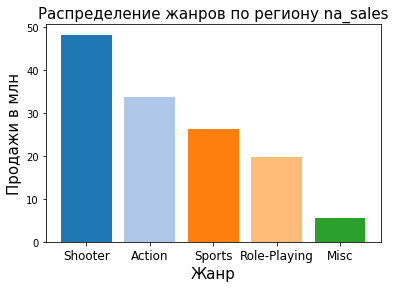

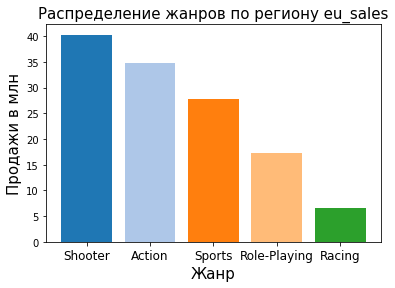

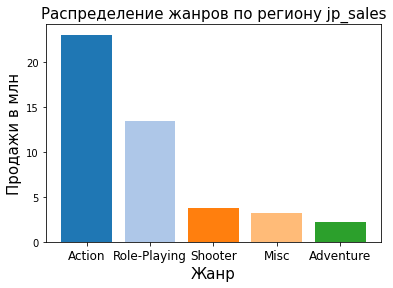

In [41]:
# пройдем циклом по каждому региону и выведем графики продаж по топ-5 жанрам
# в каждом регионе с суммарным показателем
for region in region_sales:
    top_5_in_region = df_actual.pivot_table(index='genre', 
                                     values=region, 
                                     aggfunc='sum').sort_values(by=region, ascending=False).iloc[:5]

    plt.title(f'Распределение жанров по региону {region}')
    plt.ylabel('Продажи в млн')
    plt.xlabel('Жанр')
    plt.bar(top_5_in_region.index, top_5_in_region[region], color=[colors[key] for key in labels])
    plt.show()

Первые 4 места среди жанров по продажам в Северной Америке и Европе имеют одинаковое распределение:
- Shooter
- Action
- Sports
- Role-Playing

Отличие распределения в том что в Северной Америке любят игры в жанре Misc а в Европе - Racing.

В Японии же первые 2 места с огромным отрывом от остальных занимают жанры Action и Role-Playing. Остальные 3 позиции распределены в небольшом диапазоне, в них попали (Shooter, Misc и Adventure). Стоит отметить что игры жанра Shooter показывают очень маленькие продажи в Японии в сравнении с другими регионами, нам давно известно о не популярности насилия в играх в этой стране.

### Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

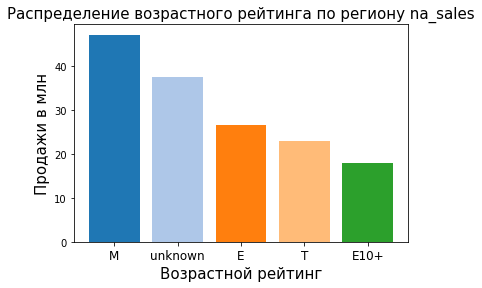

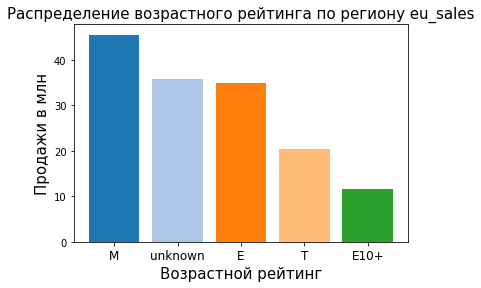

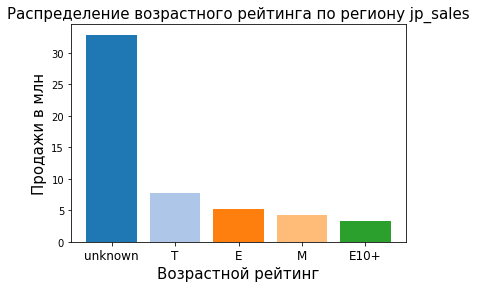

In [42]:
# пройдем циклом по каждому региону и выведем графики продаж
# в зависимости от возрастного рейтинга
for region in region_sales:
    pivot_rating = df_actual.pivot_table(index='rating', 
                                         values=region, 
                                         aggfunc='sum').sort_values(by=region, ascending=False)
    
    plt.title(f'Распределение возрастного рейтинга по региону {region}')
    plt.ylabel('Продажи в млн')
    plt.xlabel('Возрастной рейтинг')
    plt.bar(pivot_rating.index, pivot_rating[region], color=[colors[key] for key in labels])
    plt.show()

In [43]:
df_actual['rating'].value_counts()

unknown    513
T          192
E          153
M          149
E10+       101
Name: rating, dtype: int64

В наших данных отсутствуют игры для детей младшего возраста (EC) и игры Только для взрослых (AO). По иеющимся графикам заметно что игры с рейтингом От 17 лет (M) в Японии значительно менее популярны чем в Северной Америке и Европе где они занимают лидирующую позицию. Отметим что распределение по возрастному рейтингу в Северной Америке и Европе идентичны (категории в порядке убывания 'M', 'unknown', 'E', 'T', 'E10+'). Категория без возрастного рейтинга в Японии лидирует с огромным отрывом от всех остальных в то время как в Северной Америке и Европе она на втором месте.

## Проверим гипотезы

- H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H1: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые.

In [44]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df_actual.loc[df_actual['platform'] == 'XOne', 'user_score'].dropna(),
    df_actual.loc[df_actual['platform'] == 'PC', 'user_score'].dropna(),
    equal_var=False)

# зададим значение уровня значимости
alpha = .05

display(f'p-value = {results.pvalue}')

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-value = 0.2946308864003345'

'Не получилось отвергнуть нулевую гипотезу'

У нас достаточно оснований пологать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- H0: Средние пользовательские рейтинги жанров Action и Sports  равны.
- H1: Средние пользовательские рейтинги жанров Action и Sports  разные.

In [45]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    df_actual.loc[df_actual['genre'] == 'Action', 'user_score'].dropna(),
    df_actual.loc[df_actual['genre'] == 'Sports', 'user_score'].dropna(),
    equal_var=False)

# зададим значение уровня значимости
alpha = .05

display(f'p-value = {results.pvalue}')

if results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'p-value = 5.97163549920592e-10'

'Отвергаем нулевую гипотезу'

У нас достаточно оснований чтобы отвергнуть гипотезу о равенстве пользовательских рейтингов в жанрах Action и Sports. Для проверки гипотезы был выбран t-test так как он применяется для сравнения средних показателей 2х совокупностей по выборкам из них или по самим савокупностям если их объем не велик. Для не зависимых выборок нулевая гипотеза всегда говорит о равенстве, по этому альтернативная гипотеза говорит о том что показатели не равны.

## Вывод

### В ходе исследования мы выполнили следующие шаги:
>* Изучили общую информацию.


>* Подготовим данные:
    - Привели названия столбцов к нижнему регистру.
    - Преобразовали данные в нужные типы.
    - Обработали пропуски.
    - Посчитали обшие продажи во всех регионах.
 
 
>* Провели исследовательский анализ данных:
    - Посмотрели, сколько игр выпускалось в разные годы.
    - Посмотрели, как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам.
    - Определили какие платформы лидируют по продажам, растут или падают. Выбрали несколько потенциально прибыльных платформ.
    - Построили графики по глобальным продажам игр в разбивке по платформам.
    - Посмотрели, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами.
    - Соотнесли выводы с продажами игр на других платформах.
    - Посмотрели на общее распределение игр по жанрам.


>* Составили портрет пользователя каждого региона.
    - Самые популярные платформы (топ-5).
    - Самые популярные жанры (топ-5).
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    

>* Проверили гипотезы.
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    



### Нами были получены следующие выводы:

>До 1994 года выпускалось очень мало игр (отметку в 50 преодалели только в 1993 году). Начиная с 1994 года годовое производство игр превысило 120 и очень сильно росло ежегодно вплоть до 2009 года после чего пошло на спад. Данные за все периоды не важны для данного исследования так как платформы имеют свойство устаревать и на их смену приходят новые более технически продвинутые.


>Самая старая платформа в нашем топ-10 это 'PS', просуществовала 10 лет. Через 6 лет после старта продаж игр на 'PS' появились новые платформв: 'GBA' и 'PS2', первая из которых просуществовала 8 лет а вторая 12. В дальнейшем появление новых платформ ускорилось. Из данного графика можно сделать вывод что популярные платформы существуют примерно от 8 до 12 лет, и новые поколения платформ выходят на рынок в диапазоне от 4 до 6 лет.


>По результатам исследования предидущих вопросов было решено использовать данные начиная с 2015 года, так как данные имеют свойство устаревать, тем более в такой быстроразвивающейся сфере как игровая индустрия, в эту выборку попадут консоли которые еще не потеряли своей актуальности и игры на них производятся в 2016 году. Считаю что периуд с 2015 по 2016 является наиболее подходящим для нашего исследования.


>По продажам можно выделить 4 лидирующие платформы: 'PS4', 'XOne', '3DS', 'WiiU'. По всем лидирующим платформам последнии 2 года продажи падают. Не смотря на падение продаж, потенциально прибыльными платформами можно назвать 'XOne' и 'PS4' так как это самые новые платформы из данного списка. Так же можно отметить '3DS' и 'WiiU' которые показывают не очень высокие но достаточно стабильные результаты. Но стоит учитывать появление новых платформ в ближайшие пару лет так как 'XOne' и 'PS4' существуют уже 4 года и пользовательский спрос на игры в последнии 2 года начал снижаться.
Так же стоит отметить платформу 'PC', игры на нее будут выходить всегда хоть и пользуются меньшей популярностью (в топ платформ за последнии 2 года 'PC' занимает 6 место из 10 с показателем проданных коппий в 13.7 млн)


>По графикам видно что медианное значение продаж по обеим платформам находится на одном уровне но при этом у 'PS4' больше межквартильный размах что говорит нам о большей вариативности показателя продаж (большее количество игр по продажам сильнее отклоняется от средних показателей). Так же у 'PS4' намного больше выбросов вверх, есть даже 2 явных лидера с показателем проданых копий более 12 млн. И в целом у 'PS4' больше игр с высоким показателем продаж.


>По графику заметна положительная линейная зависимость между оценкой критиков и общими продажами. Показатель корреляции по коэффиценту Пирсона 0.3928485555130601..


>По графику заметна очень слабая, отрицательная зависимость между оценкой пользователей и общими продажами. Показатель корреляции по коэффиценту Пирсона -0.05973845712638215. Можно считать что корреляция нулевая.


>При проверке корреляции взаимосвязи оценок пользователей и критиков с продажими по платформам 'XOne' и '3DS' мы получили схожие результаты по 'XOne', а '3DS' имеет слабую положительную зависимость продаж как от оценок критиков так и от оценок пользователей. (Данные могут быть не точные так как по платформе '3DS' У нас маленькая выборка оценок).


>По графикам можно заметить что лидером выходящих на рынок игр, с огромным отрывом от остальных является жанр 'Action'. Но по медианному значению продаж занимает лишь 7 место. На первом же месте по продажам стоит жанр 'Shooter' так же с огромным отрывом остальных. На 2 и 3 месте расположились 'Sports' и 'Role-Playing'. Можно сказать что стрелялок выходит не так уж много по отношению к другим жанрам но они являются самыми востребованными среди пользователей.


>По графикам распределения продаж среди топ-5 платформ по регионам можно отметить что Японский рынок потреблял игр намного меньше чем Европа и Северная Америка. Платформа '3DS' популярная в Японии (1 место по продажам с показателем около 23 млн копий) в Северной Америке заняла 3 место по рейтингу а в Европейский топ_5 вовсе не попала. 'PS4' лидирует в Северной Америке и Европе. 'XOne' не попавший в топ платформ Японии находится на 2 месте в других регионах и в Северной Америке популярнее чем в Европе более чем вдвое. 'PC' попал в топ Европы заняв 3 место. 'WiiU' попала в топ Северной Америки и Европы. Так же стоит отметить платформу которая заняла 3 место в Японии - 'PSV', и популярность устаревших 'PS3' в Японии и Европе и 'X360' в Северной Америке.


>Первые 4 места среди жанров по продажам в Северной Америке и Европе имеют одинаковое распределение:
- Shooter
- Action
- Sports
- Role-Playing
>Отличие распределения в том что в Северной Америке любят игры в жанре Misc а в Европе - Racing.
В Японии же первые 2 места с огромным отрывом от остальных занимают жанры Action и Role-Playing. Остальные 3 позиции распределены в небольшом диапазоне, в них попали (Shooter, Misc и Adventure). Стоит отметить что игры жанра Shooter показывают очень маленькие продажи в Японии в сравнении с другими регионами, нам давно известно о не популярности насилия в играх в этой стране.


>В наших данных отсутствуют игры для детей младшего возраста (EC) и игры Только для взрослых (AO). По иеющимся графикам заметно что игры с рейтингом От 17 лет (M) в Японии значительно менее популярны чем в Северной Америке и Европе где они занимают лидирующую позицию. Отметим что распределение по возрастному рейтингу в Северной Америке и Европе идентичны (категории в порядке убывания 'M', 'unknown', 'E', 'T', 'E10+'). Категория без возрастного рейтинга в Японии лидирует с огромным отрывом от всех остальных в то время как в Северной Америке и Европе она на втором месте.


>У нас достаточно оснований пологать что средние пользовательские рейтинги платформ Xbox One и PC разные.


>У нас недостаточно оснований чтобы отвергнуть гипотезу о равенстве пользовательских рейтингов в жанрах Action и Sports. Для проверки гипотезы был выбран t-test так как он применяется для сравнения средних показателей 2х совокупностей по выборкам из них или по самим савокупностям если их объем не велик. Для не зависимых выборок нулевая гипотеза всегда говорит о равенстве, по этому альтернативная гипотеза говорит о том что показатели не равны.

### Итоги.

На момент исследования самыми популярными консолями являются XOne и PS4, вторая показывает лучшие результаты. Остальные кое как дожившие до 2016 года платформы можно считать устаревшими. На Японском рынке лидирует платформа '3DS'. Последнии 2 года продажи по всем платформам держат тренд на понижение. Стоит учитывать что и XOne и PS4 существуют уже 4 года, это означает то что в ближайшие пару лет ожидается выход консолей нового поколения. 

По рынкам сбыта надо учитывать то что самые популярные в Европе и Северной Америке игры жанра Shooter и игры с рейтингом "От 17 лет", менее популярны в Японее, в которой первые места занимают игры в жарнрах Action и Role-Play и без возрастного рейтинга.

Так же отметим что между оценками пользователей и уровнем продаж нет линейной связи. А оценки критиков имеют влияние на продажи, хоть и не значительное в некоторых регионах.

Поставленая цель по проверке гипотез были сделаны следующие выводы:
- У нас достаточно оснований пологать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- У нас достаточно оснований чтобы отвергнуть гипотезу о равенстве пользовательских рейтингов в жанрах Action и Sports. Следовательно средние пользовательские рейтинги жанров Action и Sports не равны.


Еще есть замечание по данным. У половины данных не проставлены оценки пользователей и критиков.